<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Problem Statement



# Samsung Internal SSD Reviews prediction

Rating predictions using reviews written by users can be a useful problem statement in E-commerce domain and can be used for recommending similar products that may interest users. The dataset in this problem statement comprises reviews pertaining to Samsung Internal SSD product specifically SAMSUNG 850 EVO 2.5" 250GB SATA III 3D NAND Internal Solid State Drive (SSD) MZ-75E250B/AM from the NewEgg Store website.  We will build a Natural Language processing model using Glove embeddings which is trained on reviews given by customers that have used the product and try to predict ratings given a new rating.




### Objective:
Given the reviews provided by customers, can you train a model that accurately predicts the corresponding rating of a review?

### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

- review_title : The Title for the customer review

- overall_review: The whole customer review details

- pros: The customer opinion about the good things in this product

- cons: The customer opinion about the bad things in this product

- ownership_pariod: How long the customer owned this product

- date: When the review was written

- rating_stars: The product rating from 1 to 5

- year: In which year the review was written

- month: In which month the review was written

- day: In which day the review was written

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Model Building

6. Conclusion and Interpretation

7. Food for thought

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### Read the dataset and check top 5 rows

In [4]:
df = pd.read_csv("/content/drive/My Drive/ssd_reviews.csv")
df.head()

,Unnamed: 0,review_title,overall_review,pros,cons,ownership_pariod,date,rating_stars,year,month,day
0,0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN,years,2019-12-05 12:58:58,5,2019,12,5
1,1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN,years,2019-11-01 08:25:45,5,2019,11,1
2,2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far,years,2019-10-27 17:05:49,5,2019,10,27
3,3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...,years,2019-10-24 18:29:43,5,2019,10,24
4,4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN,years,2019-09-11 19:21:03,5,2019,9,11


### Check info of the dataset and write your findings

In [5]:
df.shape

(2227, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2227 non-null   int64 
 1   review_title      2131 non-null   object
 2   overall_review    1448 non-null   object
 3   pros              2205 non-null   object
 4   cons              2216 non-null   object
 5   ownership_pariod  2159 non-null   object
 6   date              2227 non-null   object
 7   rating_stars      2227 non-null   int64 
 8   year              2227 non-null   int64 
 9   month             2227 non-null   int64 
 10  day               2227 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 191.5+ KB


From the above we can conclude that:
  1.  There are 2227 data points and 11 features in our dataset.
  2.  We have some missing values in the "review_title" and "overall_review" column.
  3.  The columns "date", "month", "year" and "date" are redundant features.

## 4.  Data Analysis and Preparation

### 4.1 Checking missing values
#### Check for missing values (along with the percentage of null values)

In [7]:
df.isna().sum()

Unnamed: 0            0
review_title         96
overall_review      779
pros                 22
cons                 11
ownership_pariod     68
date                  0
rating_stars          0
year                  0
month                 0
day                   0
dtype: int64

In [8]:
df.isna().sum() / len(df) * 100

Unnamed: 0          0.0000000
review_title        4.3107319
overall_review     34.9797934
pros                0.9878761
cons                0.4939380
ownership_pariod    3.0534351
date                0.0000000
rating_stars        0.0000000
year                0.0000000
month               0.0000000
day                 0.0000000
dtype: float64

### 4.2 Analyzing the target column (Rating_stars)

#### Check the value counts of 'rating_stars' and write your comments

In [9]:
df["rating_stars"].value_counts()

5    1756
4     181
1     153
3      77
2      60
Name: rating_stars, dtype: int64

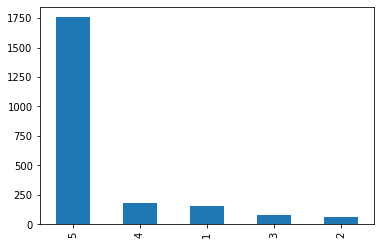

In [10]:
df["rating_stars"].value_counts().plot(kind = 'bar')

Most of the customers have rated the prodduct a 5 star.

### 4.3 Let's analyze other features like year, month, and day etc.
#### Check value counts of 'year' and write your observations., Comment on the range of years, frequency of ratings in each year.

In [11]:
df["year"].value_counts()

2015    1006
2016     605
2017     370
2018     187
2019      46
2014      13
Name: year, dtype: int64

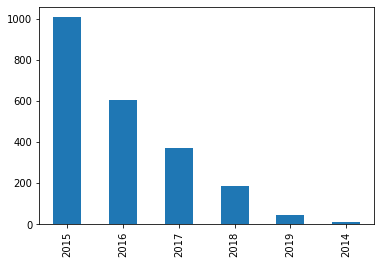

In [12]:
df["year"].value_counts().plot(kind = 'bar')

Most of the customers have rated the product in the year 2015 aand the number of ratings have reduced in the subsquent months.

#### Check mean rating for each year and write your findings

In [13]:
df.groupby('year')["rating_stars"].mean()

year
2014   4.9230769
2015   4.4582505
2016   4.5900826
2017   4.5108108
2018   4.3475936
2019   4.3478261
Name: rating_stars, dtype: float64

#### Check value counts of 'month' and write your observations. Comment on the frequency of ratings and discuss if the rating count and mean rating is higher/low on certain months.

In [14]:
df["month"].value_counts()

12    278
2     239
3     234
1     221
4     205
11    191
5     158
9     157
7     144
10    141
6     140
8     119
Name: month, dtype: int64

In [15]:
df.groupby('month')["rating_stars"].mean()

month
1    4.6425339
2    4.4058577
3    4.6111111
4    4.4195122
5    4.4493671
6    4.5571429
7    4.7638889
8    4.4789916
9    4.5414013
10   4.3049645
11   4.4607330
12   4.3597122
Name: rating_stars, dtype: float64

### 4.4 Combine text features
#### Drop all the numerical features ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod'] and ['rating_stars']

In [16]:
Numeric_cols = ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod' , 'rating_stars']
text_data = df.drop(Numeric_cols, axis = 1)
text_data.head()

,review_title,overall_review,pros,cons
0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN
1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN
2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far
3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...
4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN


In [17]:
text_data.isna().sum()

review_title       96
overall_review    779
pros               22
cons               11
dtype: int64

#### Replace null values (NaN) with blanks

In [18]:
text_data.fillna(" ", inplace = True)

In [19]:
text_data.isna().sum()

review_title      0
overall_review    0
pros              0
cons              0
dtype: int64

#### Join all text items in a row that have a space in between and Add a new column (with the newly created combined reviews) to the dataframe.

In [20]:
text_data["combined_review"] = text_data.apply(lambda x: " ".join(x), axis=1)

In [21]:
text_data.head()

,review_title,overall_review,pros,cons,combined_review
0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,,solid buy it you will not regret this purchase...
1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,,nice drive for price even cheaper by todays co...
2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far,perfect used this drive as my boot drive and o...
3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...,very snappy os boots quicker os menus pop up q...
4,worth the hype,this was the sdd that everyone said to get and...,,,worth the hype this was the sdd that everyone ...


In [22]:
data = pd.DataFrame()
data["combined_review"] = text_data["combined_review"]
data["ratings"] = df["rating_stars"]
data.head()

,combined_review,ratings
0,solid buy it you will not regret this purchase...,5
1,nice drive for price even cheaper by todays co...,5
2,perfect used this drive as my boot drive and o...,5
3,very snappy os boots quicker os menus pop up q...,5
4,worth the hype this was the sdd that everyone ...,5


#### Check if there are any null values and drop NaN values if any

In [23]:
data.isna().sum()

combined_review    0
ratings            0
dtype: int64

#### Calculate the length of each review and add it to the dataframe

In [24]:
data['len'] = data["combined_review"].apply (lambda x: len(x.split(" ")))

#### Check summary stats of the length column

In [25]:
data["len"].describe()

count   2227.0000000
mean      85.2752582
std       87.3063671
min        6.0000000
25%       31.0000000
50%       60.0000000
75%      109.0000000
max     1615.0000000
Name: len, dtype: float64

### 4.5 Analyzing and preparing the text data


#### Set the max length of each review to 25 since it results in faster training (however, you are free to change this)
#### Set max_features to 10000 and embedding size to 50

In [26]:
max_features = 10000
maxlen = 25
embedding_size = 50

#### Tokenize the cobined text data. You can use the Tokenizer from tensorflow.keras.preprocessing.text. Check the number of samples post tokenization.

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(data["combined_review"])

X = tokenizer.texts_to_sequences(data["combined_review"])

print("Number of Sample" , len(X))
print(X[0])

Number of Sample 2227
[232, 93, 6, 19, 54, 22, 829, 10, 248, 162, 16, 830, 550, 145, 7, 264, 126]


In [28]:
print(X)

[[232, 93, 6, 19, 54, 22, 829, 10, 248, 162, 16, 830, 550, 145, 7, 264, 126], [175, 7, 9, 42, 105, 436, 134, 3284, 1130, 52, 7, 42, 115, 145, 285, 1541, 209, 77, 2, 260, 6, 3285, 15, 437, 222, 2697, 32, 141, 3, 870, 15, 6, 54, 93, 17, 51, 21, 14, 612, 931], [352, 107, 10, 7, 28, 11, 46, 7, 4, 75, 96, 177, 18, 11, 445, 242, 4, 76, 176, 140, 432, 2, 114, 103, 6, 28, 11, 66, 471, 21, 279, 1232, 2698, 99, 781, 6, 49, 451, 4, 6, 21, 99, 472, 16, 576, 1, 66, 1131, 51, 47, 25, 147, 422, 15, 10, 37, 52, 384, 2699, 16, 52, 721, 31, 27, 87], [38, 871, 97, 189, 758, 97, 2700, 1894, 35, 758, 308, 159, 1088, 147, 758, 653, 562, 14, 97, 68, 116, 5, 613, 7, 17, 113, 30, 1895, 130, 131, 3, 577, 3, 1051, 34, 19, 1089, 6, 145, 14, 1, 1380], [194, 1, 1003, 10, 23, 1, 932, 20, 831, 319, 3, 71, 4, 6, 81, 195, 3, 2090, 6, 12, 166, 969, 4, 81, 736, 80, 32, 3286], [52, 42, 654, 39, 2362, 67, 10, 93, 16, 4, 63, 56, 29, 42, 473], [8, 737, 117, 99, 283, 117, 5, 228, 18, 1, 339, 850, 1233, 1, 42, 1756, 27, 2, 47,

#### Pad the above tokenized reviews data save it as independent features. Use max_len for the same.

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X , maxlen = maxlen)
print(X[0])

[  0   0   0   0   0   0   0   0 232  93   6  19  54  22 829  10 248 162
  16 830 550 145   7 264 126]


#### Check the shape of X (padded tokenized review data) and y (rating_stars) data.

In [30]:
X.shape

(2227, 25)

In [31]:
y = np.array(data["ratings"])
y.shape

(2227,)

#### Check the total number of words in the dictionary (of tekenizer)

In [32]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

8839


### 4.6 Compute the glove embeddings. Use the provided txt file for the same.

#### Read the glove embeddings from the file provided titled ‘glove.6B.50d.txt’. And save it to a dictotionary having word and corresponding embedding vector.

In [33]:
Embedding_file = "/content/drive/My Drive/glove.6B.50d.txt"
embeddings = {}

for o in open(Embedding_file):
  word = o.split(" ")[0]
  embd = o.split(" ")[1:]
  embeddings[word] = np.array(embd)

In [34]:
len(embeddings)

400000

#### Create a weight matrix for words in the training docs

In [35]:
embedding_matrix = np.zeros((num_words , 50))

for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [36]:
embedding_matrix[1]

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

#### Check length of the embedding

In [37]:
embedding_matrix.shape

(8839, 50)

### 4.7 Target Feature:- One hot encode the target variable (rating_stars)

In [38]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_enc = enc.fit_transform(y.reshape(-1,1))

In [39]:
y_enc = y_enc.todense()

### 4.8 Split the data into Train & Test sets

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , y_enc,test_size=0.3)

## 5. Model building

### 5.1 Construct a neural network architecture using embedding and LSTM layers for building the rating prediction model.
- Use the num_words, embedding_size from the above tokenizer and embeddings respectively
- Use weights from the above embedding matrix
- Use input length as the maxlen
- Add LSTM layers

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Flatten

model = Sequential()
model.add(Embedding(num_words , embedding_size , weights = [embedding_matrix] , input_length = maxlen))

model.add(LSTM(128, return_sequences = True))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))

model.add(Dense(64, activation = "relu"))

model.add(Dropout(0.2))

model.add(Dense(5, activation = "softmax"))



### 5.2 Compile the model using appropriate loss, optimizer, and accuracy metric

In [42]:
model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = "accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            441950    
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           91648     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 3

### 5.3 Fit the model

In [49]:
history = model.fit(X_train, Y_train, epochs=20, validation_data = (X_test, Y_test))

Epoch 1/20
49/49 [==============================] - 2s 46ms/step - loss: 0.0402 - accuracy: 0.9859 - val_loss: 1.2993 - val_accuracy: 0.7743
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 0.0262 - accuracy: 0.9942 - val_loss: 1.4735 - val_accuracy: 0.7997
Epoch 3/20
49/49 [==============================] - 2s 45ms/step - loss: 0.0267 - accuracy: 0.9904 - val_loss: 1.5459 - val_accuracy: 0.7683
Epoch 4/20
49/49 [==============================] - 2s 44ms/step - loss: 0.0203 - accuracy: 0.9955 - val_loss: 1.4967 - val_accuracy: 0.7205
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.0089 - accuracy: 0.9981 - val_loss: 1.4552 - val_accuracy: 0.7593
Epoch 6/20
49/49 [==============================] - 2s 45ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.5347 - val_accuracy: 0.7698
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 7.3364e-04 - accuracy: 1.0000 - val_loss: 1.6015 - val_accuracy: 0.7788
Epoch 8/2

### 5.4 Predict ratings for test data and check accuracy and confusion matrix

In [50]:
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis = 1)
prediction

array([4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 0, 4, 3, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 3, 2, 3, 4, 4, 3, 4, 4, 4, 4, 4, 0, 4, 1, 0, 4, 4, 2, 3,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 3, 4, 0, 0,
       4, 4, 3, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [51]:
Y_test_ = np.argmax(np.array(Y_test) , axis=1)
print(Y_test_)

[4 4 4 4 1 2 4 4 3 4 4 4 4 4 4 4 2 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 0 4 4
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4
 1 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 2 4 0 4 4 4 3 1 0 4 4 4 4 4 4
 4 4 4 4 4 4 1 3 4 4 3 4 4 4 4 1 4 2 4 4 4 4 4 4 3 4 4 3 3 4 4 4 4 4 4 4 4
 4 2 4 4 4 4 0 3 4 4 4 4 4 0 0 3 4 1 4 4 0 4 4 4 4 4 3 4 4 2 4 4 4 3 0 4 4
 0 4 4 4 4 4 4 4 0 3 4 4 4 4 4 4 0 3 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 2 2 4 4
 0 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 0 4 3 4 4 4 4 3 4 4 4 4 4 4 4 3 2 2 4 3
 0 2 4 4 0 4 4 4 4 4 4 4 4 4 4 0 4 3 4 4 1 4 4 4 4 4 2 4 4 2 3 0 2 4 4 4 4
 4 4 4 4 4 2 4 4 0 4 4 4 4 4 2 0 4 4 4 3 4 4 4 4 4 4 3 4 4 3 4 4 3 4 4 4 4
 4 4 4 2 0 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4
 4 2 4 4 4 4 4 4 3 2 4 4 4 0 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3
 4 0 4 4 4 4 4 4 3 4 4 4 4 0 4 4 4 4 4 2 4 0 0 4 4 4 4 4 3 4 4 4 4 4 4 3 4
 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 3 1 4 4 4 4 4 4 4 4 4 2 4 0 4 4 4 0
 4 4 3 4 4 4 4 4 4 4 0 4 

In [52]:
from sklearn.metrics import confusion_matrix , classification_report
print(confusion_matrix(Y_test_ , prediction))

[[ 20   4   2   3  16]
 [  2   2   1   1   7]
 [  3   0   2   4  18]
 [  3   1   3  10  30]
 [  8   3   5  32 489]]


In [53]:
print(classification_report(Y_test_ , prediction))

              precision    recall  f1-score   support

           0       0.56      0.44      0.49        45
           1       0.20      0.15      0.17        13
           2       0.15      0.07      0.10        27
           3       0.20      0.21      0.21        47
           4       0.87      0.91      0.89       537

    accuracy                           0.78       669
   macro avg       0.40      0.36      0.37       669
weighted avg       0.76      0.78      0.77       669



### 5.5 Display plot of training and validation loss/accuracy wrt to epochs

<function matplotlib.pyplot.legend>

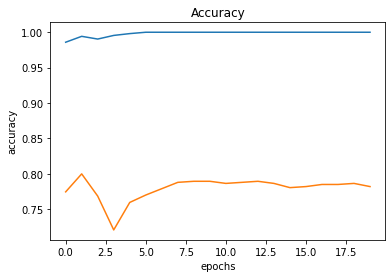

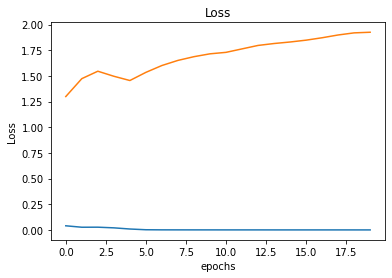

In [57]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history["accuracy"] , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , label = "Val Accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend

plt.figure(1)
plt.plot(history.history["loss"] , label = "Training Loss")
plt.plot(history.history["val_loss"] , label = "Val Loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend

## 6. Conclusion and Interpretation

As we can see that the model is overfit. It could be because the number of ratings 4 and 5 are much more as comparedto other ratings in the entire data set.

## 7. Food for thought:

1.) Change activation function (try leaky_relu or tanh) and see if it helps in improving model performance with the dataset that is highly imbalanced

2.) Try with only the overall review feature and see if it leads to improvement in model performace

3.) Change the hyperparameters of the model and compare the results 

In [59]:
# Trying tanh

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Flatten

model = Sequential()
model.add(Embedding(num_words , embedding_size , weights = [embedding_matrix] , input_length = maxlen))

model.add(LSTM(128, return_sequences = True))

model.add(Flatten())

model.add(Dense(128, activation = "tanh"))

model.add(Dense(64, activation = "tanh"))

model.add(Dropout(0.2))

model.add(Dense(5, activation = "softmax"))

In [60]:
model.compile(loss = "categorical_crossentropy" , optimizer = "adam" , metrics = "accuracy")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 50)            441950    
_________________________________________________________________
lstm_2 (LSTM)                (None, 25, 128)           91648     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

In [61]:
history1 = model.fit(X_train, Y_train, epochs=20, validation_data = (X_test, Y_test))

Epoch 1/20
49/49 [==============================] - 5s 56ms/step - loss: 0.9107 - accuracy: 0.7593 - val_loss: 0.7195 - val_accuracy: 0.7997
Epoch 2/20
49/49 [==============================] - 2s 44ms/step - loss: 0.7088 - accuracy: 0.7779 - val_loss: 0.7063 - val_accuracy: 0.7952
Epoch 3/20
49/49 [==============================] - 2s 46ms/step - loss: 0.5529 - accuracy: 0.8100 - val_loss: 0.7170 - val_accuracy: 0.7564
Epoch 4/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3770 - accuracy: 0.8774 - val_loss: 0.7716 - val_accuracy: 0.7937
Epoch 5/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2260 - accuracy: 0.9358 - val_loss: 0.8735 - val_accuracy: 0.7743
Epoch 6/20
49/49 [==============================] - 2s 45ms/step - loss: 0.1364 - accuracy: 0.9583 - val_loss: 0.9372 - val_accuracy: 0.7698
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 0.0655 - accuracy: 0.9872 - val_loss: 1.0743 - val_accuracy: 0.7414
Epoch 8/20
49

We can see that using tanh function is not making any change to the way the model is behaving.